<h1 style="text-align: center; color: green;" markdown="1">Econ320 Final Project</h1>
<h2 style="text-align: center; color: #012180" markdown="1">"Violent Crime Prevalence as a Product of its Community"</h2>
<h3 style="text-align: center; color: #012180" markdown="1">Authors: Solomon Kim, Yifeng Wu, Virginia Sanson, Dawit Dean </h2>

### Table of Contents
* [Introduction and Motivation](#anchor1)
* [Communities and Crime Data Set – Data Description, Statistics, Tables and Graphs ](#anchor2)
* [Communities and Crime Data Set – Methodology/Empirical Model](#anchor3)
* [Communities and Crime Data Set – Results and Assessment](#anchor4)
* [Conclusions and Implications](#anchor5)
* [References](#anchor6)

## I. Introduction & Motivation <a id = anchor1 ></a>

Communities in the U.S. are well-known to be breeding grounds for educational and career opportunities, social connections, healthcare accessibility, and the like. Conversely, violent crimes lead to longstanding damages to its victims and community members, and often disproportionately affect minorities and those with a lower socioeconomic status. However, how can one tell if a geographic zone has a higher or lower crime rate based on its community's attributes? If you are in an area with more lower-income or public housing, and increased homelessness, does this necessarily reflect the community's rate of violent crime? 

The inverse of this relationship has been investigated previously by Dr. Hipp in his article, "A Dynamic View of Neighborhoods:  The Reciprocal Relationship between Crime and Neighborhood Structural Characteristics." He found that neighborhoods with high violent crime rates led to increased concentrated disadvantage in these areas 10 years later, which is the prevalence of neighborhoods with residents predominantly of low socioeconomic status. Additionally, according to Miller, Cohen, and Rossman (1993), lifetime costs for violent crime from 1987-1990 totaled 178 billion USD, with $2.4 billion in costs per murder alone.

![image](https://i.ibb.co/py53pT7/320-final-hipp-figure1.jpg)

## II. Communities and Crime Data Set – Data Description, Statistics, Tables and Graphs <a id = anchor2 ></a>

We are using the dataset "Communities and Crime" which encompasses socioeconomic data from the 1990 U.S. Census, law enforcement data from the 1990 U.S. LEMAS survey, and crime data from the 1995 FBI UCR. All of the variables in the dataset are related to community characteristics within the U.S. The population included in this dataset, therefore our study, is all communities found within the U.S. 1990 Census and crime datasets (n = 1994). 

Important variables we are extracting from this data include a community's median income, percent under poverty line, population density, number of individuals living on the street (i.e. homeless people), and unemployment. 
The "per capita violent crimes" variable we are exploring was determined by determining the total number of crimes committed that are considered violent in the U.S, including murder, robbery,  assault, and rape per 100k people in that community.

All variables' data was normalized into a 0.00-1.00 range using an equal-interval binning method upon compilation of the dataset. 


In [36]:
#Importing packages
from scipy.stats import norm
from scipy.stats import t
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from tabulate import tabulate

In [37]:
com = pd.read_csv('communities.data', delimiter=',')

#remove whitespace in columns
columns = com.columns
s_columns = []
for col in columns: 
    str_ = col.strip() #removes whitespace for each element 
    s_columns.append(str_)

#update columns with no whitespace
com.columns = s_columns
com.head()

#too busy
com = com.replace('?', None)
#com


In [41]:

# use .agg to calculate the those stats
tablestats = com[['ViolentCrimesPerPop','medIncome','NumStreet', 'PctEmploy', 'PctPopUnderPov', 'PopDens', 'PctIlleg','PctImmigRec10']].agg(['count','mean', 'std'])
round(tablestats,3)



,ViolentCrimesPerPop,medIncome,NumStreet,PctEmploy,PctPopUnderPov,PopDens,PctIlleg,PctImmigRec10
count,1994.000,1994.000,1994.000,1994.000,1994.000,1994.000,1994.00,1994.000
mean,0.238,0.361,0.023,0.501,0.303,0.233,0.25,0.428
std,0.233,0.209,0.100,0.174,0.228,0.203,0.23,0.195


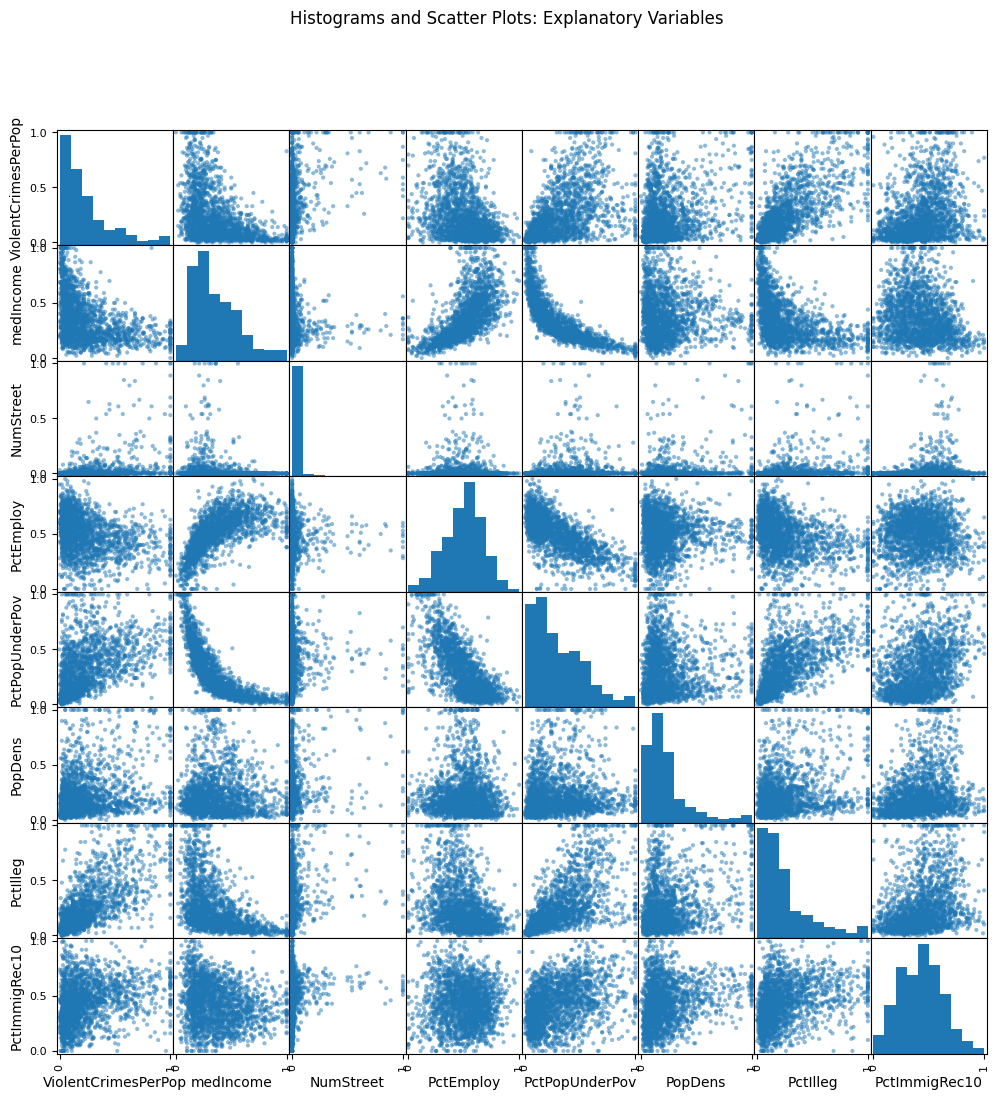

In [39]:
set1 = com[['ViolentCrimesPerPop','medIncome','NumStreet', 'PctEmploy', 'PctPopUnderPov', 'PopDens', 'PctIlleg','PctImmigRec10']]
pd.plotting.scatter_matrix(set1, alpha=0.5, figsize=(12, 12));
plt.suptitle('Histograms and Scatter Plots: Explanatory Variables');

### The subplots below show potential linear regression fit


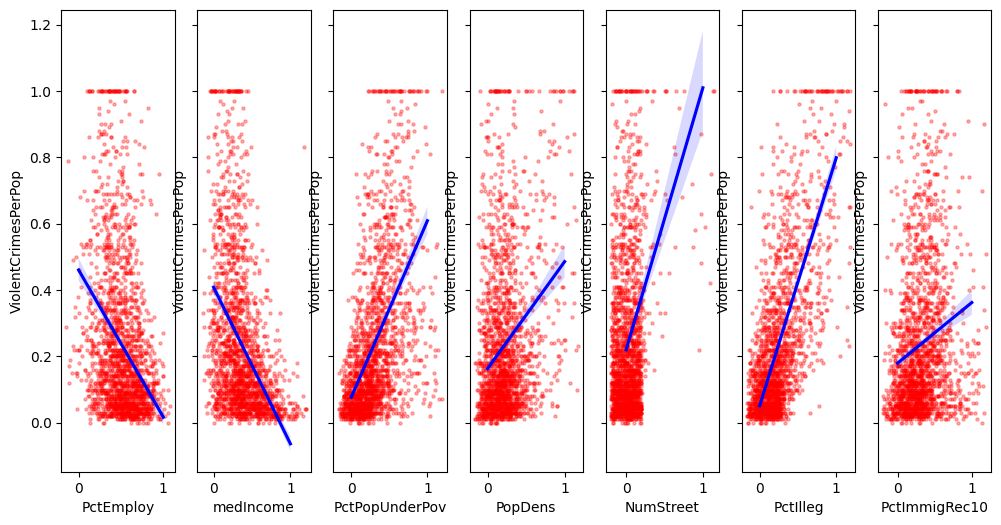

In [40]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(ncols=7, sharey=True, figsize=(12, 6))

sns.regplot(x='PctEmploy', y='ViolentCrimesPerPop', ax=ax1, data=com,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="PctEmploy");

sns.regplot(x='medIncome', y='ViolentCrimesPerPop', ax=ax2, data=com,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="medIncome");

sns.regplot(x='PctPopUnderPov', y='ViolentCrimesPerPop', ax=ax3, data=com,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="PctPopUnderPov");

sns.regplot(x='PopDens', y='ViolentCrimesPerPop', ax=ax4, data=com,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="PopDens");

sns.regplot(x='NumStreet', y='ViolentCrimesPerPop', ax=ax5, data=com,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="NumStreet");

sns.regplot(x='PctIlleg', y='ViolentCrimesPerPop', ax=ax6, data=com,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="PctIlleg");

sns.regplot(x='PctImmigRecent', y='ViolentCrimesPerPop', ax=ax7, data=com,line_kws= {'color':'blue'},marker='o',
           scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="PctImmigRec10");

According to the graphs above, both 'PctEmploy' and 'medIncome' display an inverse relationship with 'ViolentCrimesPerPop.' Residents with average higher income and higher employment rate have a more stable lives and therefore have lower chances to commit crimes. Oppositely, the other three variables are positively correlated to 'ViolentCrimesPerPop' since they all negatively contribute to public security. The higher percentage of people under poverty line, the higher chances that they would commit crimes. Similarly, crimes are also more rampants in the high population density areas where the homeless gather. 

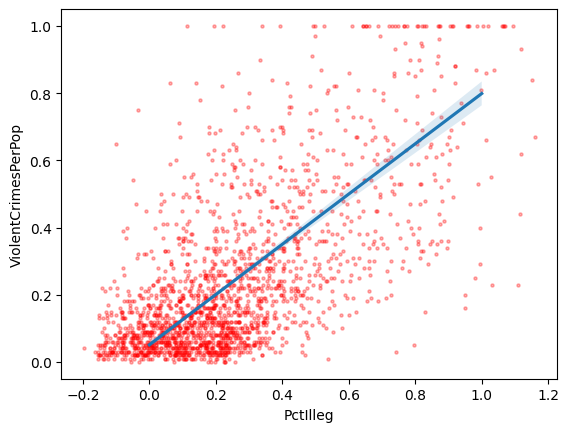

In [20]:
sns.regplot(x='PctIlleg', y='ViolentCrimesPerPop', 
            marker='o',
            data = com,
            scatter_kws={'color':'red', 's':5, 'alpha':0.3}, x_jitter = 0.2).set(
                                                  xlabel="PctIlleg");

When compared to peers raised by married family, kids who were born to single parent are more likely to face emotional and behavioral challenge, such as propensity for violence, high-risk behaviors, etc. Therefore, we hypothesize that percentage of kids born to never married has a positive relationship with the total number of violent crimes per 100k population as demonstrated by the graph above. 

### Correlation: Pearson Heatmap

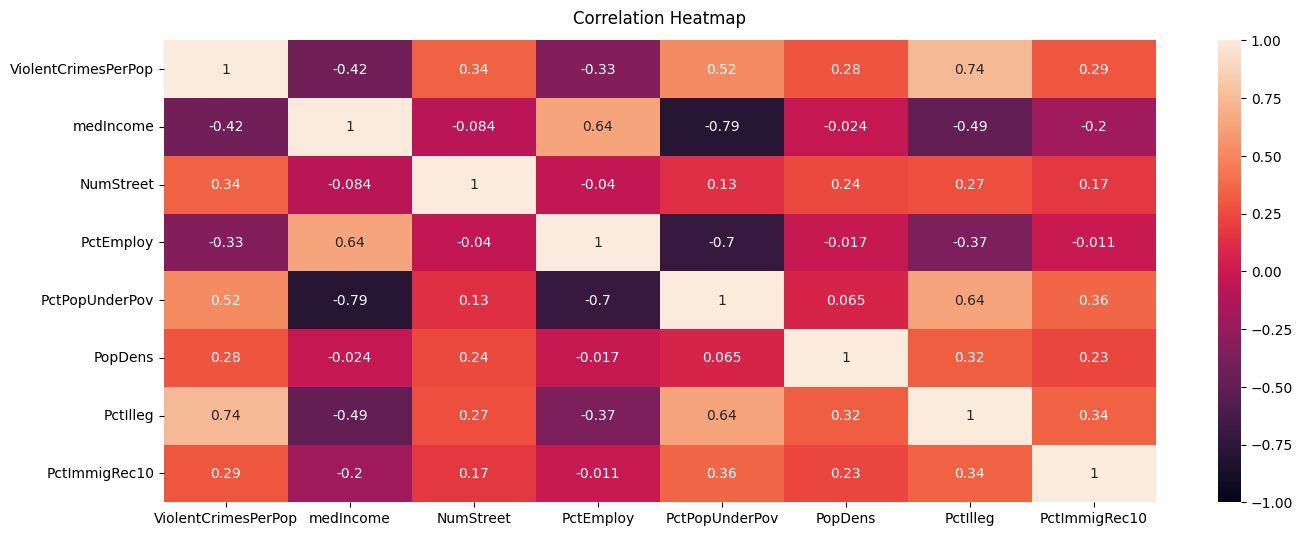

In [42]:
set1 = com[['ViolentCrimesPerPop','medIncome','NumStreet', 'PctEmploy', 'PctPopUnderPov', 'PopDens', 'PctIlleg', 'PctImmigRec10']]
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(set1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## III. Communities and Crime Data Set – Methodology/Empirical Model <a id = anchor3 ></a>

We believe violent crime in an area is a function of multiple factors, including:
- median income
- percent born out of wedlock (ie. family factors)
- population density
- number of individuals living on the street (i.e. homeless people)
- unemployment. 
- percent immigrants

Although the causes of crime are undoubtedly complex, these variables extract key information about the socioeconomic wellbeing of a community, and factors such as poverty, underemployment, or homelessness that may cause an individual to resort to crime. We included the percent of illegal immigrants in a city to test the common perception that this population subgroup increases violent crime in an area. We overall hypothesize that there is a correlation between these variables and violent crime in a community. 

### Colinearity Concerns:

We believe that an acceptable level of colinearity will exist within our chosen parameters, but not one that will harm the integrity of the study. In the US as a whole, there is a wide range of possible salaries and costs of living from city-to-city. Further analysis will reveal if our parameters are unacceptably correlated, and we will be able to adjust our strategy accordingly. 

### Proposed Economic Model:

$$ViolentCrimesPerPop = median\,income+ percentage\,employed + percentage\,under\,poverty\,line + number\,of\,homeless\,on\,street + population\,density\,per\,square mile + percentage\,out\,of\,wedlock + percentage\,immigrants\,in\,last\,10\,years$$

- *Median Income (US $):* Individuals with more discretionary income will be less likely to commit crimes in pursuit of luxury items. Similarly, lower-income areas may have higher incidence of crime, both of luxury items and of essential items such as food or hygiene products, due to financial difficulty.

- *Percentage Employed:* People who are employed will firstly have less time to spend pursuing criminal activity, and secondly will have fewer reasons to resort to criminal activity, due to having a regular, stable income and structure in their life.

- *Percentage under Poverty Line:* People with an income at the poverty line, which would allow for their basic needs (such as food, groceries, etc.) will enjoy a more stable life, and will be less likely to turn to crimes such as shoplifting or robbery to gain any necessary items. Crimes such as these run the risk of escalating to violence.

- *Number of Homeless on the Street:* Increased prevalence of homelessness are signs of unaffordable housing, unemployment, limited public assistance centers, and overall increased poverty. There is also a homelessness-jail cycle where those who are unsheltered tend to have more interactions with the police and justice system due to factors such as criminalization of vagrancy, and those with past crime convictions are more likely to experience homelessness. 

- *Population Density per Square Mile:* Cities with higher population density experience overcrowding, which increases opportunities for social interaction and competitiveness. These traits increase the risk of crime. There is also a feedback loop relationship, as denser areas often have a larger police force, therefore a higher number of reported crimes.

- *Percent Illegitimate (Born out of Wedlock)*: Children born out of wedlock encounter often unstable family structures and other perilous socioeconomic conditions, which could be a motivator for criminal activity.


- *Percentage of Immigrants in last 10 years:* Immigrants in the U.S. are often associated with criminal activity, including violent crimes such as assault, homicide, domestic violence, and sexual offences. Additionally, there are concerns with illegal immigration in particular that have aroused public debate. We want to test whether this association is true within our dataset. Looking back 10 years in our dataset allows for us to capture the effect of recent immigration, rather than overall immigration over the history of the community.

### Econometric Model:

$$ViolentCrimesPerPop = \beta_0 + \beta_1 medIncome + \beta_2 PctPopUnderPov +\beta_3 PctEmploy + \beta_4 NumStreet + \beta_5 PopDens + \beta_6 PctIlleg + \beta_7 PctImmigRec10$$


In [43]:
# Running proposed model
pd.options.display.max_seq_items = 2000

#put in stargazer
crime1 = smf.ols(formula='ViolentCrimesPerPop ~ medIncome', data=com).fit()
crime2 = smf.ols(formula='ViolentCrimesPerPop ~ medIncome + PctEmploy', data=com).fit()
crime3 = smf.ols(formula='ViolentCrimesPerPop ~ medIncome + PctEmploy + PctPopUnderPov', data=com).fit()
crime4 = smf.ols(formula='ViolentCrimesPerPop ~ medIncome + PctEmploy + PctPopUnderPov + NumStreet', data=com).fit()
crime5 = smf.ols(formula='ViolentCrimesPerPop ~ medIncome + PctEmploy + PctPopUnderPov + NumStreet + PopDens', data=com).fit()
crime6 = smf.ols(formula='ViolentCrimesPerPop ~ medIncome + PctEmploy + PctPopUnderPov + NumStreet + PopDens + PctIlleg', data=com).fit()
crime7 = smf.ols(formula='ViolentCrimesPerPop ~ medIncome + PctEmploy + PctPopUnderPov + NumStreet + PopDens + PctIlleg + PctImmigRec10', data=com).fit()


stargazer = Stargazer([crime1, crime2, crime3, crime4, crime5, crime6, crime7])

stargazer.covariate_order(['Intercept','medIncome' , 'PctEmploy', 'PctPopUnderPov' ,'NumStreet', 'PopDens', 'PctIlleg', 'PctImmigRec10'])
stargazer.rename_covariates({'medIncome': 'Median Income', 'PctEmploy' : 'Percent Employed', 'PctPopUnderPov': 'Population % Under Poverty', 
                             'NumStreet': 'Homeless on Street', 'PopDens': 'Population Density', 'PctIlleg':'Percent Illegitimate', 'PctImmigRec10':'Percent Immigrants in Last 10 Years'})
stargazer


## IV. Communities and Crime Data Set – Results and Assessments <a id = anchor4 ></a>

### Assumption 3: Test for Perfect Collinearity/Multicollinearity

In [13]:
# Compute and view VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
XX = com[['medIncome', 'PctEmploy', 'PctPopUnderPov', 'NumStreet', 'PopDens', 'PctIlleg','PctImmigRec10']].copy()
XX['intercept'] = 1 

# Compute and view VIF
vif = pd.DataFrame()
vif['variables'] = XX.columns
vif['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif['Multicollinearlity is a Problem'] = [vif['VIF'][i] >= 10 for i in range(XX.shape[1])] 

# View results using print
vif   

,variables,VIF,Multicollinearlity is a Problem
0,medIncome,2.797775,False
1,PctEmploy,2.390405,False
2,PctPopUnderPov,5.073176,False
3,NumStreet,1.114120,False
4,PopDens,1.237956,False
5,PctIlleg,2.049839,False
6,PctImmigRec10,1.410490,False
7,intercept,46.272656,True


We do not observe a high variable inflation factor, except for the intercept, which is not a cause of concern. We have high R2 and low standard errors for all regressors in each specification, indicating that our model is accurate without significant collinearity concerns.

In [44]:
from statsmodels.compat import lzip

# BP test
test = sms.het_breuschpagan(crime7.resid, crime7.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print('B-P Test')
display(pd.DataFrame(lzip(labels,test)))

B-P Test


,0,1
0,LM Statistic,2.559335e+02
1,LM-Test p-value,1.511527e-51
2,F-Statistic,4.177745e+01
3,F-Test p-value,3.235877e-55


Our LM and F p-value are both extremely small, so we reject the null hypothesis of homoskedasticity. Running the Bresuch-Pagan Test does indicate the presence of heteroskedasticity in our model. 

**Below is the transformed regression**

In [54]:
# FGLS: Estimation of the variance function
com['logu2'] = np.log(crime7.resid**2)
var_lm = smf.ols('logu2 ~ medIncome + PctEmploy + PctPopUnderPov + NumStreet + PopDens + PctIlleg + PctImmigRec10', data=com).fit()

# FGLS: WLS
com['w'] = 1 / np.exp(var_lm.predict())

import statsmodels.api as stmod
crime_fgls = stmod.WLS(com['ViolentCrimesPerPop'], stmod.add_constant(com[['NumStreet', 'PopDens', 'medIncome', 'PctEmploy', 'PctPopUnderPov', 'PctIlleg', 'PctImmigRec10']]), weights = com['w']).fit()


stargazer2 = Stargazer([crime_fgls])
stargazer2.covariate_order(['medIncome' , 'PctEmploy', 'PctPopUnderPov' ,'NumStreet', 'PopDens', 'PctIlleg','PctImmigRec10'])

stargazer2.rename_covariates({'medIncome': 'Median Income', 'PctEmploy' : 'Percent Employed', 'PctPopUnderPov': 'Population % Under Poverty', 
                            'NumStreet': 'Homeless on Street', 'PopDens': 'Population Density', 'PctIlleg':'Percent Illegitimate', 'PctImmigRec10':'Percent Immigrants in Last 10 Years'})

stargazer2


## V. Conclusions & Implications <a id = anchor5 ></a>

Our  model shows the largest factors in violent crime are homeless on street and percent of illegitimate children. Median income and percent employed have a small negative predicted effect on violent crimes per capita, and population density has a modest positive effect. Due to equally-binned normalization, it is difficult to assess the unit impact for non-percentage regressors outside of the context of each individual regressor's distribution. It seems clear that socioeconomic characteristics **do influence rates of crime in the area.** However, accepting this as true raises several follow-up questions, such as whether socioeconomic characteristics cause crime, or if crime causes a decrease in socioeconomic standards of living due to disinvestment from the community, withdrawal of support systems, or other factors. The causes and factors are undoubtedly complex, and cannot be fully explained by a multiple regression model.

Interestingly, holding all else equal, a 1% increase in recent immigrants in a community would predict a 0.029 increase in crimes per 100k population in that community. This increase, while small, might suggest the presence of  immigrants in a community leads to higher violent crime rates. More research is needed into this specific area, especially into the hot-button issue of illegal immigration, as other literature (Light, He and Robey 2020) indicates fewer arrests and charges among undocumented immigrants in Texas when compared to the average. 

Further research or subsequent studies in this area could include more recent data on this topic, specifically examining the effect of illegal immigration on the area, since that is one specific area where our data specifically contradicted existing scholarship. Additionally, differing state standards for crime reporting (specifically in frequency of rape), led to some missing or incomplete values for total violent crimes. A more complete data-set would allow us to more accurately study the issue, and understand the impact of socioeconomic factors on violent crime rates in the United States.

## References <a id = anchor6 ></a>

“Neighborhoods and Violent Crime: HUD USER.” Neighborhoods and Violent Crime | HUD USER, https://www.huduser.gov/portal/periodicals/em/summer16/highlight2.html. 

Miller, T. R., Cohen, M. A., & Rossman, S. B. (1993). Victim costs of violent crime and resulting injuries. Health Affairs, 12(4), 186–197. https://doi.org/10.1377/hlthaff.12.4.186

Light, M. T., He, J., &amp; Robey, J. P. (2020). Comparing crime rates between undocumented immigrants, legal immigrants, and native-born US citizens in Texas. Proceedings of the National Academy of Sciences, 117(51), 32340–32347. https://doi.org/10.1073/pnas.2014704117 

Hipp, John R. “A Dynamic View of Neighborhoods: The Reciprocal Relationship Between Crime and Neighborhood Structural Characteristics.” Social Problems, vol. 57, no. 2, 2010, pp. 205–230., https://doi.org/10.1525/sp.2010.57.2.205. 